# Alcohol Metabolism in Men and Women - An observational Study
Women exhibit a lower tolerance for alcohol and develop alcohol-related liver disease more readily than men.  When men and women of the same size and drinking history consume equal amounts of alcohol, the women on average carry a higher concentration of alcohol in their bloodstream.  According to a team of Italian researchers, this occurs because alcohol-degrading enzymes in the stomach (where alcohol is partially metabolized before it enters the bloodstream and is eventually metabolized by the liver) are more active in men that in women.  The researchers studies the extent to which the activity of the enzyme explained the first-pass alcohol metabolism and the extent to which ist explained the first-pass metabolism between women and men.  (Data from M. Frezza et al., "High Blood Alcohol Levels in Women," *New England Journal of Medicine* 322 (1990): 95-99.)

The subjects were 18 men and 14 women, all living in Trieste.  Three of the women and five of the men were categorized as alcoholic.  All subjects received ethanol, at a dose of 0.3 grams per kilogram of body weight, orally one day and intravenously another, in randomly determined order.  Since the intravenous administration bypasses the stomach, the difference in blood alcohol concentration - the concentration after intravenous administration minus the concentration after oral administration - provides a measure of "first-pass metabolism" in the stomach.  In addition, gastric alcohol dehydrogenase (AD) activity (activity of the key enzyme) was measured in mucus samples taken from the stomach linings.

Several questions arise.  Do levels of first-pass metabolism differ between men and women?  Can the differences be explained by postulating that men have more dehydrogenase activity in their stomachs?  Are the answers to these questions complicated by an alcoholism effect?

In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.formula.api as smf

sns.set()

We begin by reading the data and summarizing the variables.

In [2]:
path = pathlib.Path.home() / 'data' / 'sleuth3' / 'case1101.csv'
df = pd.read_csv(path)
df.head()

,Subject,Metabol,Gastric,Sex,Alcohol
0,1,0.6,1.0,Female,Alcoholic
1,2,0.6,1.6,Female,Alcoholic
2,3,1.5,1.5,Female,Alcoholic
3,4,0.4,2.2,Female,Non-alcoholic
4,5,0.1,1.1,Female,Non-alcoholic


In [3]:
summary = df.describe()
summary

,Subject,Metabol,Gastric
count,32.000000,32.000000,32.000000
mean,16.500000,2.421875,1.862500
std,9.380832,2.658490,0.964114
min,1.000000,0.100000,0.800000
25%,8.750000,0.600000,1.200000
50%,16.500000,1.700000,1.600000
75%,24.250000,2.925000,2.200000
max,32.000000,12.300000,5.200000


Text(0, 0.5, 'First-Pass Metabolism (mmol/liter-hour)')

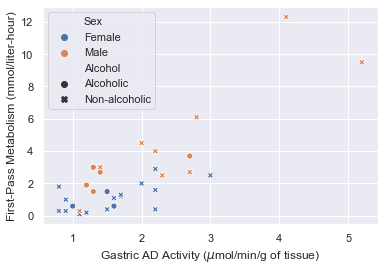

In [4]:
ax = sns.scatterplot(x='Gastric', y='Metabol',
                     hue='Sex', style='Alcohol', 
                     data=df)
ax.set_xlabel('Gastric AD Activity ($\mu$mol/min/g of tissue)')
ax.set_ylabel('First-Pass Metabolism (mmol/liter-hour)')

In [10]:
formula = (
    'Metabol ~ Gastric + C(Sex) + C(Alcohol) '
    '+ Gastric:C(Sex) + C(Sex):C(Alcohol) + Gastric:C(Alcohol) '
    '+ Gastric:C(Sex):C(Alcohol)'
)
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Metabol   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     16.47
Date:                Sat, 21 Sep 2019   Prob (F-statistic):           9.35e-08
Time:                        18:59:13   Log-Likelihood:                -48.052
No. Observations:                  32   AIC:                             112.1
Df Residuals:                      24   BIC:                             123.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              0.1065      3.839      0.028      0.978      -7.818       8.031
C(Sex)[T.Male]                                         0.7860      4.187      0.188      0.853      -7.855       9.427
C(Alcohol)[T.Non-alcoholic]                           -0.3004      3.939     -0.076      0.940      -8.431       7.830
C(Sex)[T.Male]:C(Alcohol)[T.Non-alcoholic]            -2.2517      4.394     -0.512      0.613     -11.320       6.816
Gastric                                                0.5806      2.759      0.210      0.835      -5.114       6.275
Gastric:C(Sex)[T.Male]                                 0.4748      2.933      0.162      0.873      -5.579       6.528
Gastric:C(Alcohol)[T.Non-alcoholic]                    0.2601      2.807      0.093      0.927      -5.533       6.053
Gastric:C(Sex)[T.Male]:C(Alcohol)[T.Non-alcoholic]     1.1987      2.998      0.400      0.693      -4.989       7.386
==============================================================================
Omnibus:                        9.228   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               10.936
Skew:                           0.672   Prob(JB):                      0.00422
Kurtosis:                       5.529   Cond. No.                         158.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Residuals')

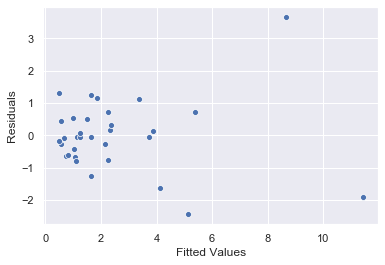

In [8]:
ax = sns.scatterplot(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')

In [9]:
df[results.fittedvalues > 6]

,Subject,Metabol,Gastric,Sex,Alcohol
30,31,9.5,5.2,Male,Non-alcoholic
31,32,12.3,4.1,Male,Non-alcoholic


# Statistical Conclusion
The following inferences pertain only to individuals with gastric AD activity levels between 0.8 and 3.0 $\mu$mol/min/g.  No reliable model could be determined for values greater than 3.0  There was no evidence from the data that alcoholism was related to first-pass metabolism in any way ($p$-value = 0.93, from an F-test for significance of alcoholism and its interaction with gastric activity and sex.)  Convincing evidence exists that first-pass metabolism was larger for males than for females overall (two-sided $p$-value = 0.0002, from a rank-sum test) and that gastric AD activity was larger for males than for females (two-sided $p$-value = 0.07 from a rank-sum test).  Males had higher first-pass metabolism than females even accounting for differences in gastric AD activity (two-sided $p$-value = 0.0003 from a $t$-test for equality of male and female slopes when both intercepts are zero).  For a given level of gastric dehydrogenase activity, the mean first-pass alcohol metabolism for men is estimated to be 2.20 times as large as the first-pass alcohol metabolism for women (approximate 95% confidence interval from 1.37 to 3.04).